# ERA-5 on Google Cloud w/ xarray + zarr 

Original notebook: https://github.com/google-research/arco-era5/blob/main/docs/0-Surface-Reanalysis-Walkthrough.ipynb

Check [weatherbench2](https://github.com/google-research/weatherbench2) later

## Opening the Data

In [1]:
import fsspec

fs = fsspec.filesystem('gs')
fs.ls('gs://gcp-public-data-arco-era5/ar/')

['gcp-public-data-arco-era5/ar/1959-2022-1h-240x121_equiangular_with_poles_conservative.zarr',
 'gcp-public-data-arco-era5/ar/1959-2022-1h-360x181_equiangular_with_poles_conservative.zarr',
 'gcp-public-data-arco-era5/ar/1959-2022-6h-128x64_equiangular_conservative.zarr',
 'gcp-public-data-arco-era5/ar/1959-2022-6h-128x64_equiangular_with_poles_conservative.zarr',
 'gcp-public-data-arco-era5/ar/1959-2022-6h-1440x721.zarr',
 'gcp-public-data-arco-era5/ar/1959-2022-6h-240x121_equiangular_with_poles_conservative.zarr',
 'gcp-public-data-arco-era5/ar/1959-2022-6h-512x256_equiangular_conservative.zarr',
 'gcp-public-data-arco-era5/ar/1959-2022-6h-64x32_equiangular_conservative.zarr',
 'gcp-public-data-arco-era5/ar/1959-2022-6h-64x32_equiangular_with_poles_conservative.zarr',
 'gcp-public-data-arco-era5/ar/1959-2022-full_37-1h-0p25deg-chunk-1.zarr-v2',
 'gcp-public-data-arco-era5/ar/1959-2022-full_37-6h-0p25deg-chunk-1.zarr-v2',
 'gcp-public-data-arco-era5/ar/1959-2022-full_37-6h-0p25deg_der

In [5]:
import xarray as xr

reanalysis = xr.open_zarr(
    'gs://gcp-public-data-arco-era5/ar/full_37-1h-0p25deg-chunk-1.zarr-v3',
    chunks=None,
    storage_options=dict(token='anon'),
)

In [6]:
print(f'size: {reanalysis.nbytes / (1024 ** 4)} TiB')

size: 3344.695211229595 TiB


In [7]:
reanalysis

<xarray.Dataset>
Dimensions:                                                          (
                                                                      time: 1323648,
                                                                      latitude: 721,
                                                                      longitude: 1440,
                                                                      level: 37)
Coordinates:
  * latitude                                                         (latitude) float32 ...
  * level                                                            (level) int64 ...
  * longitude                                                        (longitude) float32 ...
  * time                                                             (time) datetime64[ns] ...
Data variables: (12/273)
    100m_u_component_of_wind                                         (time, latitude, longitude) float32 ...
    100m_v_component_of_wind                                         (time, latitude, longitude) float32 ...
    10m_u_component_of_neutral_wind                                  (time, latitude, longitude) float32 ...
    10m_u_component_of_wind                                          (time, latitude, longitude) float32 ...
    10m_v_component_of_neutral_wind                                  (time, latitude, longitude) float32 ...
    10m_v_component_of_wind                                          (time, latitude, longitude) float32 ...
    ...                                                               ...
    wave_spectral_directional_width_for_swell                        (time, latitude, longitude) float32 ...
    wave_spectral_directional_width_for_wind_waves                   (time, latitude, longitude) float32 ...
    wave_spectral_kurtosis                                           (time, latitude, longitude) float32 ...
    wave_spectral_peakedness                                         (time, latitude, longitude) float32 ...
    wave_spectral_skewness                                           (time, latitude, longitude) float32 ...
    zero_degree_level                                                (time, latitude, longitude) float32 ...
Attributes:
    valid_time_start:  1940-01-01
    last_updated:      2024-08-27 07:32:47.309165
    valid_time_stop:   2024-05-31

In [183]:
#reanalysis.t2m.attrs #Don't run

# 'GRIB_name': '2 metre temperature'
# 'GRIB_cfVarName': 't2m'
#'GRIB_paramId': 167
# 'GRIB_shortName': '2t'

55151.958333333336

In [8]:
recent_an = reanalysis.sel(time='2020-01-01 12:00:00')

In [9]:
print(f'size: {recent_an.nbytes / (1024 ** 4)} TiB')

size: 0.0025268847712140996 TiB


In [10]:
recent_an

<xarray.Dataset>
Dimensions:                                                          (
                                                                      latitude: 721,
                                                                      longitude: 1440,
                                                                      level: 37)
Coordinates:
  * latitude                                                         (latitude) float32 ...
  * level                                                            (level) int64 ...
  * longitude                                                        (longitude) float32 ...
    time                                                             datetime64[ns] ...
Data variables: (12/273)
    100m_u_component_of_wind                                         (latitude, longitude) float32 ...
    100m_v_component_of_wind                                         (latitude, longitude) float32 ...
    10m_u_component_of_neutral_wind                                  (latitude, longitude) float32 ...
    10m_u_component_of_wind                                          (latitude, longitude) float32 ...
    10m_v_component_of_neutral_wind                                  (latitude, longitude) float32 ...
    10m_v_component_of_wind                                          (latitude, longitude) float32 ...
    ...                                                               ...
    wave_spectral_directional_width_for_swell                        (latitude, longitude) float32 ...
    wave_spectral_directional_width_for_wind_waves                   (latitude, longitude) float32 ...
    wave_spectral_kurtosis                                           (latitude, longitude) float32 ...
    wave_spectral_peakedness                                         (latitude, longitude) float32 ...
    wave_spectral_skewness                                           (latitude, longitude) float32 ...
    zero_degree_level                                                (latitude, longitude) float32 ...
Attributes:
    valid_time_start:  1940-01-01
    last_updated:      2024-08-27 07:32:47.309165
    valid_time_stop:   2024-05-31

In [11]:
#recent_an = recent_an.sel(level=1000)
recent_an['2m_temperature'].values

array([[245.96442, 245.96442, 245.96442, ..., 245.96442, 245.96442,
        245.96442],
       [246.19832, 246.20139, 246.20293, ..., 246.19061, 246.19215,
        246.19678],
       [246.29988, 246.30603, 246.31064, ..., 246.28448, 246.29065,
        246.2968 ],
       ...,
       [247.46014, 247.46477, 247.47092, ..., 247.44937, 247.45245,
        247.45708],
       [247.15239, 247.15393, 247.157  , ..., 247.14622, 247.14777,
        247.1493 ],
       [246.74306, 246.74306, 246.74306, ..., 246.74306, 246.74306,
        246.74306]], dtype=float32)

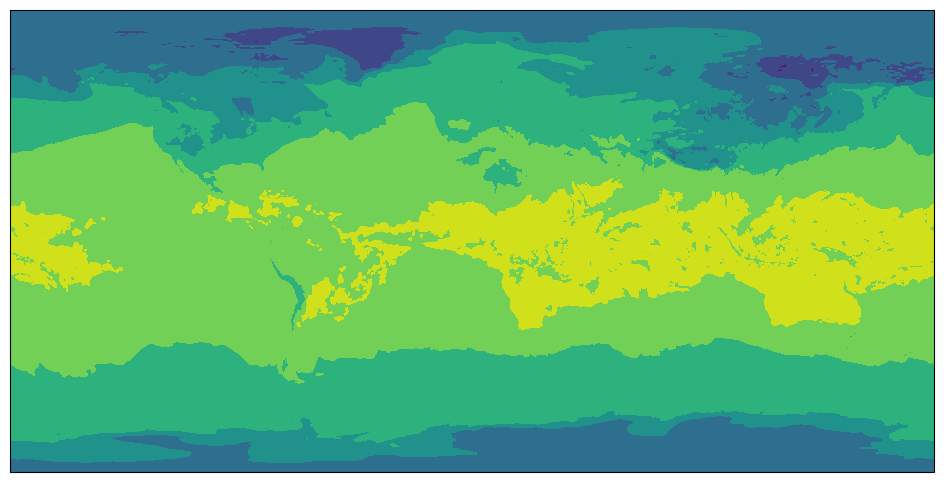

In [13]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

crs = ccrs.PlateCarree()

#lon_2d, lat_2d = np.meshgrid(recent_an['longitude'], recent_an['latitude'])

plt.figure(figsize=(12, 6))
plt.axes(projection=crs)
plt.contourf(recent_an['longitude'],recent_an['latitude'],recent_an['2m_temperature'])

